<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Barplot-config" data-toc-modified-id="Barplot-config-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Barplot config</a></span></li><li><span><a href="#Load-pt-wikcionario-xml-file" data-toc-modified-id="Load-pt-wikcionario-xml-file-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Load pt wikcionario xml file</a></span></li></ul></li><li><span><a href="#Words-with-[p]-,-[m]-,-[lh]-and-[nh]" data-toc-modified-id="Words-with-[p]-,-[m]-,-[lh]-and-[nh]-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Words with [p] , [m] , [lh] and [nh]</a></span></li><li><span><a href="#Free-diphtong-words" data-toc-modified-id="Free-diphtong-words-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Free diphtong words</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-syllable-annotated-datasets" data-toc-modified-id="Load-syllable-annotated-datasets-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Load syllable annotated datasets</a></span></li></ul></li></ul></li><li><span><a href="#[lh]-and-[nh]" data-toc-modified-id="[lh]-and-[nh]-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>[lh] and [nh]</a></span><ul class="toc-item"><li><span><a href="#vowels" data-toc-modified-id="vowels-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>vowels</a></span></li><li><span><a href="#contiguous-left" data-toc-modified-id="contiguous-left-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>contiguous left</a></span><ul class="toc-item"><li><span><a href="#Load-syllable-annotated-datasets" data-toc-modified-id="Load-syllable-annotated-datasets-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Load syllable annotated datasets</a></span></li></ul></li><li><span><a href="#position" data-toc-modified-id="position-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>position</a></span><ul class="toc-item"><li><span><a href="#Load-syllable-annotated-datasets" data-toc-modified-id="Load-syllable-annotated-datasets-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Load syllable annotated datasets</a></span></li></ul></li><li><span><a href="#double-position" data-toc-modified-id="double-position-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>double position</a></span></li></ul></li></ul></div>

## Packages

In [1]:
import os
import re

import codecs
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import squarify 

import urllib

## Barplot config

In [2]:
sns.set(color_codes=True)

def show_values_on_bars_v(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() - 0.01 + p.get_width() / 2.
            _y = p.get_y() + p.get_height() * 1.02
            value = '{:.3f}%'.format(p.get_height()*100)
            ax.text(_x, _y+0.3, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def show_values_on_bars_h(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() #+ 0.4
            _y = p.get_y() + p.get_height()
            value = '{:.3f}%'.format(p.get_width()*100)
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        

def show_values_on_bars_reg_v(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2 + 8))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() - 0.01 + p.get_width() / 2.
            _y = p.get_y() + p.get_height() * 1.02
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y+0.3, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def show_values_on_bars_reg_h(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2+8,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + 0.4
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_width())
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## Load pt wikcionario xml file

From https://dumps.wikimedia.org/ptwiktionary/latest/

In [3]:
file_name = "ptwiktionary-latest-abstract.xml"

with open(file_name, encoding="utf-8") as f:
    pt_dict = f.read()

In [4]:
pt_dict = urllib.parse.unquote(pt_dict)

an_words = re.findall("https\:\/\/pt\.wiktionary\.org\/wiki\/(.+)\#Angola", pt_dict)
mz_words = re.findall("https\:\/\/pt\.wiktionary\.org\/wiki\/(.+)\#Moçambique", pt_dict)
st_words = re.findall("https\:\/\/pt\.wiktionary\.org\/wiki\/(.+)\#São", pt_dict)
gu_words = re.findall("https\:\/\/pt\.wiktionary\.org\/wiki\/(.+)\#Guiné", pt_dict)
cv_words = re.findall("https\:\/\/pt\.wiktionary\.org\/wiki\/(.+)\#Cabo", pt_dict)
ti_words = re.findall("https\:\/\/pt\.wiktionary\.org\/wiki\/(.+)\#Timor", pt_dict)
pt_words = re.findall("https\:\/\/pt\.wiktionary\.org\/wiki\/(.+)\#Portugal", pt_dict)
br_words = re.findall("https\:\/\/pt\.wiktionary\.org\/wiki\/(.+)\#Brasil", pt_dict)

all_words = list(set(pt_words) | set(br_words) | set(an_words) | set(mz_words)
                 | set(st_words) | set(gu_words) | set(cv_words) | set(ti_words))

all_words = [i.lower() for i in all_words]
all_words = [i.replace('_', ' ') for i in all_words]

word_df = pd.DataFrame(all_words, columns=['word'])
word_df

,word
0,peão
1,petulância
2,inchar
3,pior
4,renome
...,...
13978,enxurrada
13979,areeiro
13980,estudante
13981,pudico


# Words with [p] , [m] , [lh] and [nh]

In [5]:
p_m_nh_lh_dipth_stats_list = []
p_m_nh_lh_dipth_stats_list.append(["word_all",len(word_df)])
print("total unique words: " + str(len(word_df)))

total unique words: 13983


In [6]:
word_p = word_df[word_df["word"].str.contains("p")]
p_m_nh_lh_dipth_stats_list.append(["word_p",len(word_p)])
word_p

,word
0,peão
1,petulância
3,pior
6,permanentemente
16,plantão
...,...
13961,específico
13965,arpejo
13972,microscópio
13976,especialidade


In [7]:
m_list = "m[aáàâãeéèêiíìoóòôõuúù]"
word_m = word_df[word_df["word"].str.contains(m_list)]
p_m_nh_lh_dipth_stats_list.append(["word_m",len(word_m)])
word_m

,word
4,renome
6,permanentemente
11,comité
17,malgaxe
19,fechamento
...,...
13940,alemão
13941,vasilhame
13952,minúcia
13955,megafone


In [8]:
word_lh = word_df[word_df["word"].str.contains("lh")]
p_m_nh_lh_dipth_stats_list.append(["word_lh",len(word_lh)])
word_lh

,word
56,atabalhoadamente
114,detalhar
201,rolha
219,galho
337,guilhotina
...,...
13861,migalha
13878,folho
13880,verdelhão
13916,molhe


In [9]:
word_nh = word_df[word_df["word"].str.contains("nh")]
p_m_nh_lh_dipth_stats_list.append(["word_nh",len(word_nh)])
word_nh

,word
10,inhala
48,nhanduti
82,cunhado
140,garanhão
174,banhar
...,...
13822,daninho
13841,azinheira
13867,desgrenhado
13892,alinho


In [10]:
p_m_nh_lh_dipth_stats = pd.DataFrame(p_m_nh_lh_dipth_stats_list, columns=["item","length"])
p_m_nh_lh_dipth_stats

,item,length
0,word_all,13983
1,word_p,2674
2,word_m,2728
3,word_lh,322
4,word_nh,243


In [11]:
max_total_words_length = p_m_nh_lh_dipth_stats["length"].max()

p_m_nh_lh_dipth_stats["length"] = p_m_nh_lh_dipth_stats["length"]/max_total_words_length
p_m_nh_lh_dipth_stats["length"] = p_m_nh_lh_dipth_stats["length"].round(5)
p_m_nh_lh_dipth_stats.drop(index=p_m_nh_lh_dipth_stats.index[0], axis=0, inplace=True)
p_m_nh_lh_dipth_stats

,item,length
1,word_p,0.19123
2,word_m,0.19509
3,word_lh,0.02303
4,word_nh,0.01738


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

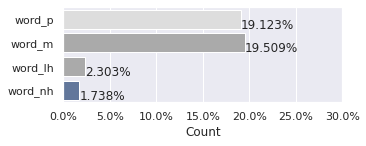

In [12]:
all_colors = {
    #'word_all': '#dddddd',
    'word_p': '#aaaaaa',
    'word_m': '#aaaaaa',
    'word_lh': '#5975a4',
    'word_lh_clitic': '#5975a4',
    'word_nh': '#cc8963',
    'word_nh_diminutive': '#cc8963'
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))

fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item" , data=p_m_nh_lh_dipth_stats)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set(xlim=(0, 0.3))
show_values_on_bars_h(ax)
fig.set_size_inches(5, 1.5)
ax.set(xlabel="Count", ylabel="")

In [13]:
writer = pd.ExcelWriter("word_wikcionario_lh_nh.xlsx", 
                        engine='xlsxwriter', 
                        options={'encoding':'utf-8'}) 

word_lh.to_excel(writer, index=False, sheet_name='word_lh')
word_nh.to_excel(writer, index=False, sheet_name='word_nh')

writer.save()

# Free diphtong words

In [14]:
dipht_free_ai = word_df[word_df["word"].str.contains("ai")]
dipht_free_ei = word_df[word_df["word"].str.contains("ei|éi")]
dipht_free_oi = word_df[word_df["word"].str.contains("oi|ói")]
dipht_free_ui = word_df[word_df["word"].str.contains("ui")]
dipht_free_ui = dipht_free_ui[~dipht_free_ui["word"].str.contains("gui|qui")]

In [15]:
writer = pd.ExcelWriter("word_wikcionario_dipht_free.xlsx", 
                        engine='xlsxwriter', 
                        options={'encoding':'utf-8'}) 

dipht_free_ai.to_excel(writer, index=False, sheet_name='dipht_free_ai')
dipht_free_ei.to_excel(writer, index=False, sheet_name='dipht_free_ei')
dipht_free_oi.to_excel(writer, index=False, sheet_name='dipht_free_oi')
dipht_free_ui.to_excel(writer, index=False, sheet_name='dipht_free_ui')

writer.save()

### Load syllable annotated datasets
Syllabifier from https://portulanclarin.net/workbench/lx-syllabifier/

Syllabifier included in new column of word_dicio_aberto_dipht_free.xlsx file copy sheets.

In [16]:
dipht_free_list = []
dipht_free_ai = pd.read_excel("word_wikcionario_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_ai")
dipht_free_ai = dipht_free_ai[dipht_free_ai["Syllabifier"].str.contains("ai•|ai$")]
dipht_free_ai = len(dipht_free_ai)

dipht_free_ei = pd.read_excel("word_wikcionario_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_ei")
dipht_free_ei = dipht_free_ei[dipht_free_ei["Syllabifier"].str.contains("ei•|ei$")]
dipht_free_ei = len(dipht_free_ei)

dipht_free_oi = pd.read_excel("word_wikcionario_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_oi")
dipht_free_oi = dipht_free_oi[dipht_free_oi["Syllabifier"].str.contains("oi•|oi$")]

dipht_free_ou_or_oi = dipht_free_oi.copy()
dipht_free_ou_or_oi["word"] = dipht_free_oi.replace(to_replace=r'oi', value='ou', regex=True)
dipht_free_ou = word_df[word_df["word"].str.contains("ou")]
dipht_free_ou_or_oi = pd.merge(dipht_free_ou, dipht_free_ou_or_oi, how = "inner", indicator = False)
dipht_free_ou_or_oi = len(dipht_free_ou_or_oi)
dipht_free_oi = len(dipht_free_oi)

dipht_free_ui = pd.read_excel("word_wikcionario_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_ui")
dipht_free_ui = dipht_free_ui[dipht_free_ui["Syllabifier"].str.contains("ui•|ui$")]
#dipht_free_ui = dipht_free_ui[~dipht_free_ui["word"].str.contains("uim$|uir$")]
dipht_free_ui = len(dipht_free_ui)

dipht_free_list.append(["dipht_free_ai",dipht_free_ai])
dipht_free_list.append(["dipht_free_ei",dipht_free_ei])
dipht_free_list.append(["dipht_free_oi",dipht_free_oi])
dipht_free_list.append(["dipht_free_ou_or_oi",dipht_free_ou_or_oi])
dipht_free_list.append(["dipht_free_ui",dipht_free_ui])

dipht_free_df = pd.DataFrame(dipht_free_list, columns=["item","length"])
dipht_free_df

,item,length
0,dipht_free_ai,160
1,dipht_free_ei,498
2,dipht_free_oi,66
3,dipht_free_ou_or_oi,5
4,dipht_free_ui,27


In [17]:
dipht_free_df["length"] = dipht_free_df["length"]/max_total_words_length
dipht_free_df["length"] = dipht_free_df["length"].round(5)
dipht_free_df

,item,length
0,dipht_free_ai,0.01144
1,dipht_free_ei,0.03561
2,dipht_free_oi,0.00472
3,dipht_free_ou_or_oi,0.00036
4,dipht_free_ui,0.00193


In [18]:
p_m_nh_lh_dipth_stats = p_m_nh_lh_dipth_stats.append(dipht_free_df)
p_m_nh_lh_dipth_stats = p_m_nh_lh_dipth_stats.reset_index(drop=True)
p_m_nh_lh_dipth_stats

,item,length
0,word_p,0.19123
1,word_m,0.19509
2,word_lh,0.02303
3,word_nh,0.01738
4,dipht_free_ai,0.01144
5,dipht_free_ei,0.03561
6,dipht_free_oi,0.00472
7,dipht_free_ou_or_oi,0.00036
8,dipht_free_ui,0.00193


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

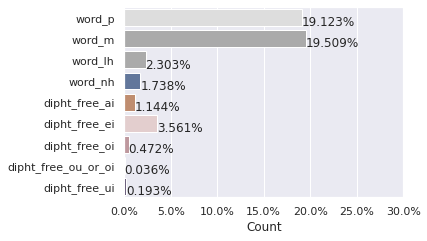

In [19]:
all_colors = {
    #'word_all': '#dddddd',
    'word_p': '#aaaaaa',
    'word_m': '#aaaaaa',
    'word_lh': '#5975a4',
    'word_nh': '#cc8963',
    'diph_free_ai': '#e6cbcb',
    'diph_free_ei': '#c49299',
    #'i': '#9f8097',
    'diph_free_oi': '#594772',
    'diph_free_oi_or_ui': '#594772',
    'diph_free_ui': '#21314e'
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))
 
fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item", data=p_m_nh_lh_dipth_stats)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.set(xlim=(0, 0.3))
show_values_on_bars_h(ax)
fig.set_size_inches(5, 3.5)
ax.set(xlabel="Count", ylabel="")

# [lh] and [nh]

## vowels

In [20]:
dipht_free_list = []
dipht_free_list.append(["a","_i",dipht_free_ai])
dipht_free_list.append(["e","_i",dipht_free_ei])
dipht_free_list.append(["i","_i",0])
dipht_free_list.append(["o","_i",dipht_free_oi])
dipht_free_list.append(["u","_i",dipht_free_ui])

dipht_free_df = pd.DataFrame(dipht_free_list, columns=["vowel","item","length"])
dipht_free_df

,vowel,item,length
0,a,_i,160
1,e,_i,498
2,i,_i,0
3,o,_i,66
4,u,_i,27


In [21]:
palatal_vowel_list = []

left_a_lh = word_df[word_df["word"].str.contains("alh|álh|àlh|âlh")]
palatal_vowel_list.append(["a","_lh",len(left_a_lh)])
left_e_lh = word_df[word_df["word"].str.contains("elh|élh|èlh|êlh")]
palatal_vowel_list.append(["e","_lh",len(left_e_lh)])
left_i_lh = word_df[word_df["word"].str.contains("ilh|ílh|ìlh")]
palatal_vowel_list.append(["i","_lh",len(left_i_lh)])
left_o_lh = word_df[word_df["word"].str.contains("olh|ólh|òlh|ôlh")]
palatal_vowel_list.append(["o","_lh",len(left_o_lh)])
left_u_lh = word_df[word_df["word"].str.contains("ulh|úlh|ùlh")]
palatal_vowel_list.append(["u","_lh",len(left_u_lh)])

left_a_nh = word_df[word_df["word"].str.contains("anh|ánh|ành|ânh")]
palatal_vowel_list.append(["a","_nh",len(left_a_nh)])
left_e_nh = word_df[word_df["word"].str.contains("enh|énh|ènh|ênh")]
palatal_vowel_list.append(["e","_nh",len(left_e_nh)])
left_i_nh = word_df[word_df["word"].str.contains("inh|ính|ình")]
palatal_vowel_list.append(["i","_nh",len(left_i_nh)])
left_o_nh = word_df[word_df["word"].str.contains("onh|ónh|ònh|ônh")]
palatal_vowel_list.append(["o","_nh",len(left_o_nh)])
left_u_nh = word_df[word_df["word"].str.contains("unh|únh|ùnh")]
palatal_vowel_list.append(["u","_nh",len(left_u_nh)])

palatal_vowel_df = pd.DataFrame(palatal_vowel_list, columns=["vowel","item","length"])

palatal_vowel_df

,vowel,item,length
0,a,_lh,112
1,e,_lh,53
2,i,_lh,90
3,o,_lh,30
4,u,_lh,36
5,a,_nh,67
6,e,_nh,28
7,i,_nh,107
8,o,_nh,20
9,u,_nh,18


In [22]:
vowel_combo_df = pd.concat([dipht_free_df, palatal_vowel_df], axis= 0)
vowel_combo_df

,vowel,item,length
0,a,_i,160
1,e,_i,498
2,i,_i,0
3,o,_i,66
4,u,_i,27
0,a,_lh,112
1,e,_lh,53
2,i,_lh,90
3,o,_lh,30
4,u,_lh,36


In [23]:
df_count = vowel_combo_df.groupby(['vowel','item']).sum().unstack()
df_count

length          
item      _i  _lh  _nh
vowel                 
a        160  112   67
e        498   53   28
i          0   90  107
o         66   30   20
u         27   36   18

In [24]:
df_count = df_count
norm_df = (df_count)/(df_count.sum())*100
norm_df

length                      
item          _i        _lh        _nh
vowel                                 
a      21.304927  34.890966  27.916667
e      66.311585  16.510903  11.666667
i       0.000000  28.037383  44.583333
o       8.788282   9.345794   8.333333
u       3.595206  11.214953   7.500000

[Text(0, 0, '_i'), Text(1, 0, '_lh'), Text(2, 0, '_nh')]

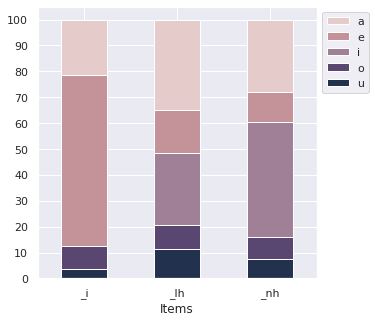

In [25]:
vowel_colors = {
    'a': '#e6cbcb',
    'e': '#c49299',
    'i': '#9f8097',
    'o': '#594772',
    'u': '#21314e'
}

vowel_order = list(vowel_colors.keys())


ax = norm_df.loc[reversed(vowel_order)].T.plot.bar(stacked=True,color = vowel_colors, figsize=(5,5), tick_label=['_i','_lh','_nh'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.0, 1.0))
ax.set( xlabel="Items")
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xticklabels(list(norm_df['length']),rotation=0)



In [26]:
palatal_vowel_df

,vowel,item,length
0,a,_lh,112
1,e,_lh,53
2,i,_lh,90
3,o,_lh,30
4,u,_lh,36
5,a,_nh,67
6,e,_nh,28
7,i,_nh,107
8,o,_nh,20
9,u,_nh,18


In [27]:
palatal_vowel_df["length"] = palatal_vowel_df["length"]/max_total_words_length
palatal_vowel_df["length"] = palatal_vowel_df["length"].round(5)
palatal_vowel_df

,vowel,item,length
0,a,_lh,0.00801
1,e,_lh,0.00379
2,i,_lh,0.00644
3,o,_lh,0.00215
4,u,_lh,0.00257
5,a,_nh,0.00479
6,e,_nh,0.00200
7,i,_nh,0.00765
8,o,_nh,0.00143
9,u,_nh,0.00129


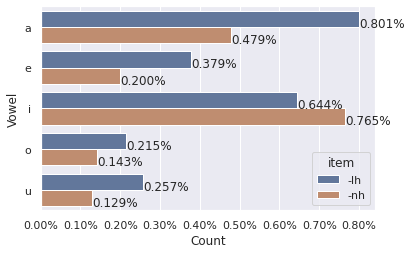

In [28]:
all_colors = {
    'word_lh': '#5975a4',
    'word_nh': '#cc8963'
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))

palatal_vowel_df["item"] = palatal_vowel_df["item"].str.replace('_', '-') # handles don't support "_"

fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="vowel",hue="item" , data=palatal_vowel_df)
handles, labels = ax.get_legend_handles_labels()
ax.set(xlabel="Count", ylabel="Vowel")

ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
show_values_on_bars_h(ax)

fig.set_size_inches(6,3.75)

## contiguous left 

In [29]:
constiguous_left_list = []

dipht_lh = "ailh|iulh|uilh|eulh|éulh|eilh|éilh|oilh|óilh|aulh|oulh"
dipht_nh = "ainh|iunh|uinh|eunh|éunh|einh|éinh|oinh|óinh|aunh|ounh"
nasal_vowel_lh = "nlh|nnh|ãlh"
nasal_vowel_nh = "ãnh|õlh|õnh"

left_nasal_vowel_lh = word_df[word_df["word"].str.contains(nasal_vowel_lh)]
constiguous_left_list.append(["left_nasal_vowel_lh",len(left_nasal_vowel_lh)])
left_dipht_lh = word_df[word_df["word"].str.contains(dipht_lh)]
left_dipht_lh = left_dipht_lh[~left_dipht_lh["word"].str.contains("guilh|quilh|guelh|quelh")]
constiguous_left_list.append(["left_dipht_lh",len(left_dipht_lh)])
left_rot_lh = word_df[word_df["word"].str.contains("rlh")]
constiguous_left_list.append(["left_rot_lh",len(left_rot_lh)])
left_lat_lh = word_df[word_df["word"].str.contains("llh")]
constiguous_left_list.append(["left_lat_lh",len(left_lat_lh)])


left_nasal_vowel_nh = word_df[word_df["word"].str.contains(nasal_vowel_nh)]
constiguous_left_list.append(["left_nasal_vowel_nh",len(left_nasal_vowel_nh)])
left_dipht_nh = word_df[word_df["word"].str.contains(dipht_nh)]
#print(left_dipht_nh)
left_dipht_nh = left_dipht_nh[~left_dipht_nh["word"].str.contains("guinh|quinh|guenh|quenh")]
constiguous_left_list.append(["left_dipht_nh",len(left_dipht_nh)])
left_rot_nh = word_df[word_df["word"].str.contains("rnh")]
constiguous_left_list.append(["left_rot_nh",len(left_rot_nh)])
left_lat_nh = word_df[word_df["word"].str.contains("lnh")]
constiguous_left_list.append(["left_lat_nh",len(left_lat_nh)])

constiguous_left_df = pd.DataFrame(constiguous_left_list, columns=["item","length"])
constiguous_left_df

,item,length
0,left_nasal_vowel_lh,0
1,left_dipht_lh,0
2,left_rot_lh,0
3,left_lat_lh,0
4,left_nasal_vowel_nh,0
5,left_dipht_nh,8
6,left_rot_nh,0
7,left_lat_nh,0


In [30]:
writer = pd.ExcelWriter("word_wikcionario_dipht_left_palatal.xlsx", 
                        engine='xlsxwriter', 
                        options={'encoding':'utf-8'}) 

left_dipht_lh.to_excel(writer, index=False, sheet_name='left_dipht_lh')
left_dipht_nh.to_excel(writer, index=False, sheet_name='left_dipht_nh')

writer.save()

### Load syllable annotated datasets
Syllabifier from https://portulanclarin.net/workbench/lx-syllabifier/

Syllabifier included in new column of word_dicio_aberto_dipht_left_palatal.xlsx file copy sheets. Phonological notes column is human corrected.

In [31]:
left_dipht_lh = pd.read_excel("word_dicio_wikcionario_left_palatal_with_syllabification.xlsx", sheet_name="left_dipht_lh")
left_dipht_lh = len(left_dipht_lh[left_dipht_lh["Syllabifier"].str.contains("ai•lh|ei•lh|oi•lh|ui•lh")])
left_dipht_nh = pd.read_excel("word_dicio_wikcionario_left_palatal_with_syllabification.xlsx", sheet_name="left_dipht_nh")
left_dipht_nh = len(left_dipht_nh[left_dipht_nh["Syllabifier"].str.contains("ai•nh|ei•nh|oi•nh|ui•nh")])
constiguous_left_df.loc[constiguous_left_df['item'] == 'left_dipht_lh', 'length'] = left_dipht_lh
constiguous_left_df.loc[constiguous_left_df['item'] == 'left_dipht_nh', 'length'] = left_dipht_nh
constiguous_left_df

,item,length
0,left_nasal_vowel_lh,0
1,left_dipht_lh,0
2,left_rot_lh,0
3,left_lat_lh,0
4,left_nasal_vowel_nh,0
5,left_dipht_nh,0
6,left_rot_nh,0
7,left_lat_nh,0


(0.0, 9.0)

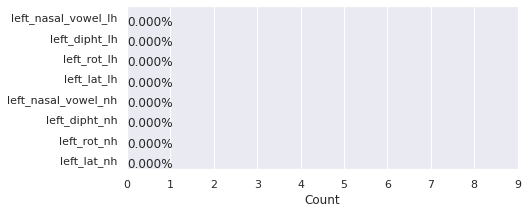

In [32]:
all_colors = {
    'word_lh': '#5975a4',
    'word_nh': '#cc8963'
}

all_colors = list(all_colors.values())
all_colors = list(np.repeat(all_colors,4))
sns.set_palette(sns.color_palette(all_colors))


fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item" , data=constiguous_left_df)
show_values_on_bars_h(ax)
fig.set_size_inches(7,3)
ax.set(xlabel="Count", ylabel="")
plt.xlim(0, 9)

## position

In [33]:
initial_lh = word_df[word_df["word"].str.contains("^lh")]
#initial_lh = len(initial_lh)
initial_nh = word_df[word_df["word"].str.contains("^nh")]
#initial_nh = len(initial_nh)

In [34]:
initial_lh

,word
1018,lhe


In [35]:
initial_nh

,word
48,nhanduti
1038,nhonhô
3578,nheengatu
8739,nhô


In [36]:
initial_list = []

initial_lh = len(initial_lh)
initial_nh = len(initial_nh)

initial_list.append(["initial_lh",initial_lh])
initial_list.append(["initial_nh",initial_nh])


df_initial = pd.DataFrame(initial_list, columns=["item","length"])
df_initial

,item,length
0,initial_lh,1
1,initial_nh,4


### Load syllable annotated datasets
Syllabifier from https://portulanclarin.net/workbench/lx-syllabifier/

Syllabifier included in new column of word_dicio_aberto_lh_nh.xlsx file copy sheets.

In [37]:
word_lh = pd.read_excel("word_wikcionario_lh_nh_with_syllabification.xlsx", sheet_name="word_lh")
word_nh = pd.read_excel("word_wikcionario_lh_nh_with_syllabification.xlsx", sheet_name="word_nh")

In [38]:
intermedial_list = []

intermedial_lh = word_lh[word_lh["Syllabifier"].str.contains("•lh[^•]+•")]
not_intermedial_lh = word_lh[word_lh["Syllabifier"].str.contains("•lh([^•])+-•se$")]
intermedial_lh = len(intermedial_lh) - len(not_intermedial_lh)

intermedial_nh = word_nh[word_nh["Syllabifier"].str.contains("•nh[^•]+•")]
not_intermedial_nh = word_nh[word_nh["Syllabifier"].str.contains("•nh([^•])+-•se$")]
intermedial_nh = len(intermedial_nh) - len(not_intermedial_nh)

intermedial_list.append(["intermedial_lh",intermedial_lh])
intermedial_list.append(["intermedial_nh",intermedial_nh])

df_intermedial = pd.DataFrame(intermedial_list, columns=["item","length"])
df_intermedial

/home/luis/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,item,length
0,intermedial_lh,94
1,intermedial_nh,78


In [39]:
final_list = []

final_lh = word_lh[word_lh["Syllabifier"].str.contains("•lh([^•])+$|•lh([^•])+-•se$")]
final_lh = len(final_lh)

final_nh = word_nh[word_nh["Syllabifier"].str.contains("•nh([^•])+$|•nh([^•])+-•se$")]
final_nh = len(final_nh)

final_list.append(["final_lh",final_lh])
final_list.append(["final_nh",final_nh])

df_final = pd.DataFrame(final_list, columns=["item","length"])
df_final

/home/luis/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,item,length
0,final_lh,227
1,final_nh,162


In [40]:
df = pd.concat([df_initial, df_intermedial, df_final], axis= 0)
df

,item,length
0,initial_lh,1
1,initial_nh,4
0,intermedial_lh,94
1,intermedial_nh,78
0,final_lh,227
1,final_nh,162


In [41]:
df["length"] = df["length"]/max_total_words_length
df["length"] = df["length"].round(5)
df

,item,length
0,initial_lh,0.00007
1,initial_nh,0.00029
0,intermedial_lh,0.00672
1,intermedial_nh,0.00558
0,final_lh,0.01623
1,final_nh,0.01159


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

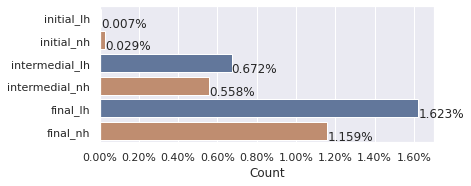

In [42]:
all_colors = {
    'word_lh': '#5975a4',
    'word_nh': '#cc8963'
}

all_colors = list(all_colors.values())
all_colors = all_colors*3
sns.set_palette(sns.color_palette(all_colors))
 

fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item" , data=df)

ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
show_values_on_bars_h(ax)

fig.set_size_inches(6,2.5)

ax.set(xlabel="Count", ylabel="")

## double position

In [43]:
double_nh = word_df[word_df["word"].str.contains(".*nh.*nh.*")]
double_nh = double_nh[~double_nh["word"].str.contains("\-")]

double_nh_no_inho_a = double_nh[~double_nh["word"].str.contains("inho$|inha$")]

double_lh = word_df[word_df["word"].str.contains(".*lh.*lh.*")]
double_lh = double_lh[~double_lh["word"].str.contains("\-")]

double_list = []
double_nh = len(double_nh)
double_nh_no_inho_a = len(double_nh_no_inho_a)
double_lh = len(double_lh)

double_list.append(["double_lh",double_lh])
double_list.append(["double_nh",double_nh])
double_list.append(["double_nh_no_inho_a",double_nh_no_inho_a])

df_double = pd.DataFrame(double_list, columns=["item","length"])
df_double

,item,length
0,double_lh,0
1,double_nh,1
2,double_nh_no_inho_a,1


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

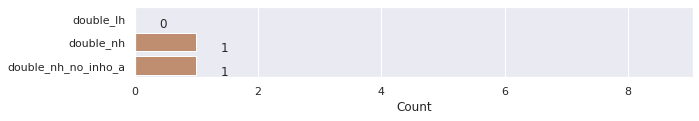

In [44]:
all_colors = ['#5975a4','#cc8963','#cc8963']
sns.set_palette(sns.color_palette(all_colors))

fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item" , data=df_double)
show_values_on_bars_reg_h(ax)
fig.set_size_inches(10,1.3)
ax.set(xlabel="Count", ylabel="")